# Наглядная демонстрация того, как размазываются частоты по **TF plots**, на примере построения сетевой наводки

In [5]:
#%matplotlib notebook
%matplotlib inline

In [28]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch, tfr_multitaper


In [13]:
#Load data
data_path = '/net/server/data/Archive/prob_learn/experiment/P001/161228/ORIGINAL_TSSS'
raw_file = op.join(data_path, 'P001_run2_raw_tsss_mc.fif')
raw = mne.io.Raw(raw_file, preload=True)

Opening raw data file /net/server/data/Archive/prob_learn/experiment/P001/161228/ORIGINAL_TSSS/P001_run2_raw_tsss_mc.fif...


<ipython-input-13-f6eea06180c1>:4: RuntimeWarning: This filename (/net/server/data/Archive/prob_learn/experiment/P001/161228/ORIGINAL_TSSS/P001_run2_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.Raw(raw_file, preload=True)


    Range : 154000 ... 303999 =    154.000 ...   303.999 secs
Ready.
Reading 0 ... 149999  =      0.000 ...   149.999 secs...


Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


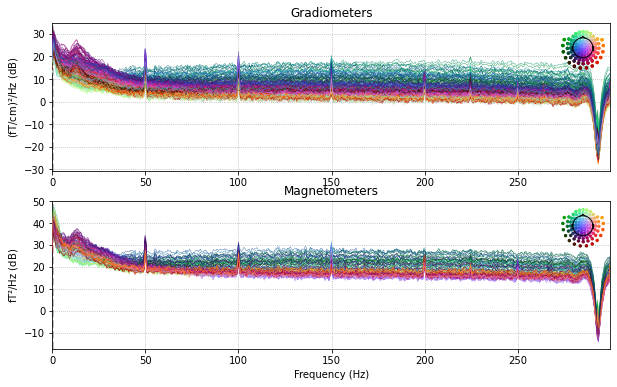

In [14]:
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=False,
                           stim=False, exclude=[])

raw.plot_psd(area_mode='range', tmax=np.inf, fmax=300, average=False);

In [15]:
events = mne.find_events(raw, stim_channel='STI101', shortest_event = 1)

199 events found
Event IDs: [ 1 10 11 16 20 21 40 41 43 44 45 46 47 50 51 52 53 60]


In [16]:
events_react = [40, 41, 43, 44, 45, 46, 47]

In [17]:
# picks MEG gradiometers
picks = mne.pick_types(raw.info, meg='grad', eeg=False, eog=True, stim=False)

In [20]:
epochs = mne.Epochs(raw, events = events, event_id = events_react, tmin = -1.750, tmax = 2.750, picks=picks,
                    baseline=None, reject=dict(grad=4000e-13),
                    preload=True)

Not setting metadata
Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Loading data for 39 events and 4501 original time points ...
0 bad epochs dropped


In [21]:
epochs.resample(200., npad='auto')  # resample to reduce computation time

<Epochs |  39 events (all good), -1.75 - 2.745 sec, baseline off, ~59.7 MB, data loaded,
 '40': 11
 '41': 13
 '43': 1
 '44': 1
 '45': 2
 '46': 5
 '47': 6>

    Using multitaper spectrum estimation with 7 DPSS windows


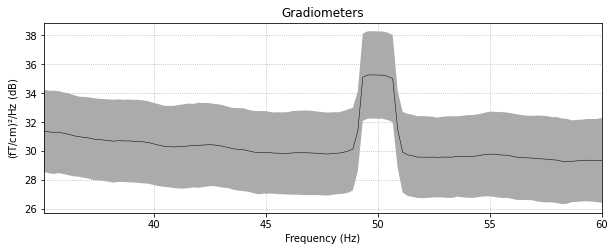

In [22]:
epochs.plot_psd(fmin=35., fmax=60., average=True, spatial_colors=False);

# Частоты от 40 до 60 с шагом 2 Гц

In [42]:
# способ задания частот
freqs = np.arange(40, 60, 2)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, time_bandwidth = 2, use_fft=False,
                        return_itc=True);


No baseline correction applied


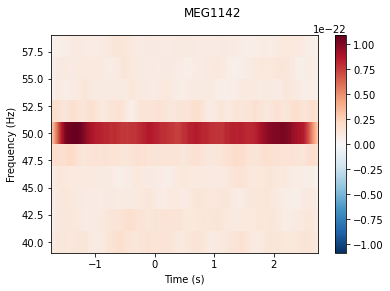

In [43]:
fig = power.plot([82], baseline=None, mode='logratio', title=power.ch_names[82], show = True);

In [44]:
fig.savefig('/home/vtretyakova/Рабочий стол/time_frequency_plots/demo_freq_40_60_step2_tb_2.jpeg', dpi = 300)

In [45]:
# способ задания частот
freqs = np.arange(40, 60, 2)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=False,
                        return_itc=True);


No baseline correction applied


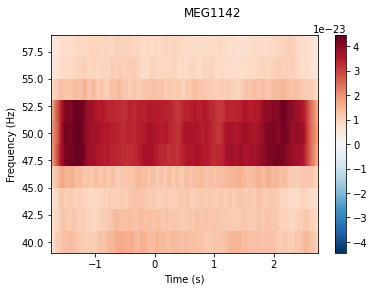

In [46]:
fig2 = power.plot([82], baseline=None, mode='logratio', title=power.ch_names[82], show = True);
fig2.savefig('/home/vtretyakova/Рабочий стол/time_frequency_plots/demo_freq_40_60_step2.jpeg', dpi = 300)

# Частоты от 40 до 60 с шагом 1 Гц

In [40]:
freqs = np.arange(40, 60, 1)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, time_bandwidth = 2, use_fft=False,
                        return_itc=True);

No baseline correction applied


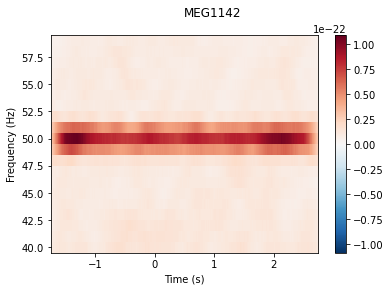

In [41]:
fig3 = power.plot([82], baseline=None, mode='logratio', title=power.ch_names[82], show = True);
fig3.savefig('/home/vtretyakova/Рабочий стол/time_frequency_plots/demo_freq_40_60_step1_tb_2.jpeg', dpi = 300)

In [47]:
freqs = np.arange(40, 60, 1)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=False,
                        return_itc=True);

No baseline correction applied


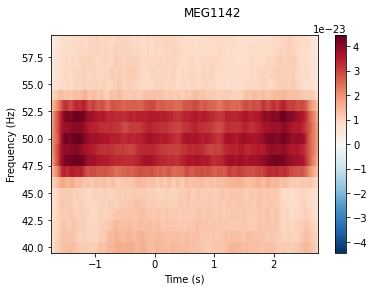

In [48]:
fig4 = power.plot([82], baseline=None, mode='logratio', title=power.ch_names[82], show = True);
fig4.savefig('/home/vtretyakova/Рабочий стол/time_frequency_plots/demo_freq_40_60_step1.jpeg', dpi = 300)